# 1| CÁC BƯỚC ĐẦU TIÊN






có 10 đặc trưng:

#### longitude, latitude:kinh độ, vĩ độ; vị trí địa lý của ngôi nhà.

#### housingMedianAge: Tuổi trung bình của các ngôi nhà trong khu vực.

#### totalRooms, totalBedrooms: Tổng số phòng và phòng ngủ trong một khu nhà.

#### population, households: Dân số và số hộ gia đình trong khu vực.

#### medianIncome: Thu nhập trung bình của các hộ gia đình trong khu nhà.

#### medianHouseValue: giá trị trung bình của các ngôi nhà trong một khu

#### oceanProximity: Vị trí của ngôi nhà đối với đại dương, biển, hoặc vịnh

### 1.1 Import các thư viện cần thiết

In [ ]:
#import các thư viện cần thiết
%matplotlib inline
import matplotlib.pyplot as plt
#xây dựng biểu đồ
import seaborn as sns
import seaborn as sns
#xử lí data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #phân chia data thành các tập huấn luyện và kiểm tra
from sklearn.linear_model import LinearRegression #để xây dựng mô hình hồi quy tuyến tính
from sklearn.preprocessing import LabelEncoder #mã hóa thành dạng số
from pandas.plotting import scatter_matrix # tạo ma trận


from sklearn.preprocessing import MinMaxScaler, StandardScaler # chuẩn hóa dữ liệu
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error,  mean_absolute_error # đánh giá hiệu suất mô hình
from sklearn.model_selection import cross_val_score #đánh giá hiệu suất mô hình
from sklearn.tree import DecisionTreeRegressor # cây quyết định
from sklearn.ensemble import RandomForestRegressor

### 1.2 Import file

In [ ]:
# đọc file housing
housing = pd.read_csv("/content/sample_data/housing.csv")


# 2 | TIỀN XỬ LÝ DỮ LIỆU

### 2.1 Tìm hiểu dữ liệu gốc

In [ ]:
# xuất số lượng dữ liệu
housing.shape

# kq: có 20640 dòng và 10 cột

(20640, 10)

In [ ]:
# xuất 10 dòng đầu tiên trong DL
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
# xuất thông tin kiểu DL và số lượng DL
housing.info()

# kiểu DL: float64 và object
# 9 cột không có giá trị null và 1 cột có giá trị null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# xuất thông tin mô tả
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2.2 Đồ thị cột đếm

<Axes: title={'center': 'Count of Class'}, xlabel='ocean_proximity', ylabel='count'>

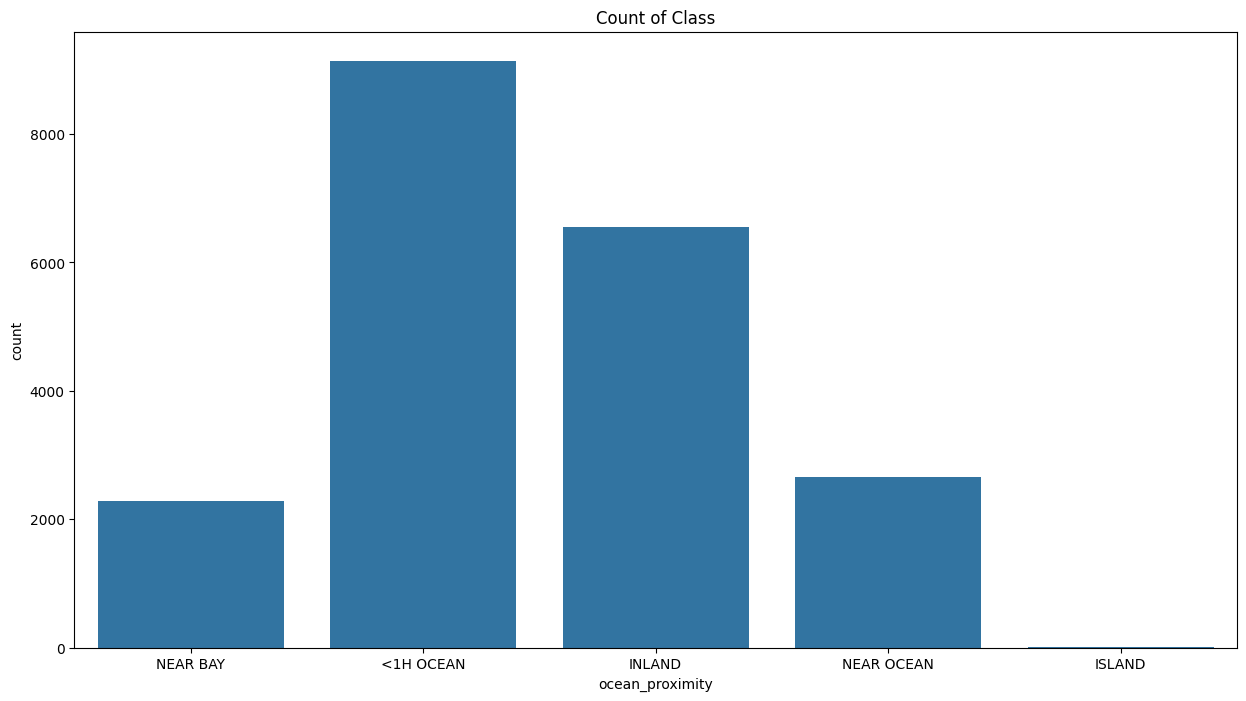

In [ ]:
# Vẽ
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=housing, x='ocean_proximity')

### 2.3 Chuyển đổi cột 'oceanProximity' thành dạng số

In [ ]:
# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi cột 'ocean_proximity' thành dạng số
housing['ocean_proximity'] = label_encoder.fit_transform(housing['ocean_proximity'])

# Đổi cột 'ocean_proximity' thành dạng float
housing['ocean_proximity'] = housing['ocean_proximity'].astype(float)

# Hiển thị DataFrame sau khi chuyển đổi
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [ ]:
# xuất thông tin kiểu dl và sluong DL
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


### 2.4 Kiểm tra giá trị null

In [ ]:
# Kiểm tra tổng giá trị null các cột chứa
housing.isnull().sum()

#kq: cột total_bedrooms chứa 207 giá trị null

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# xóa cột chứa null
housing=housing.dropna()

In [ ]:
#điền giá trị trung bình (median) của cột 'total_bedrooms' vào những ô có giá trị thiếu (NaN) trong cột đó.
#housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

In [ ]:
housing.info()

#kq: các cột đều không còn giá trị null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


In [ ]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# 3| Biểu đồ

### 3.1 Biểu đồ histogram

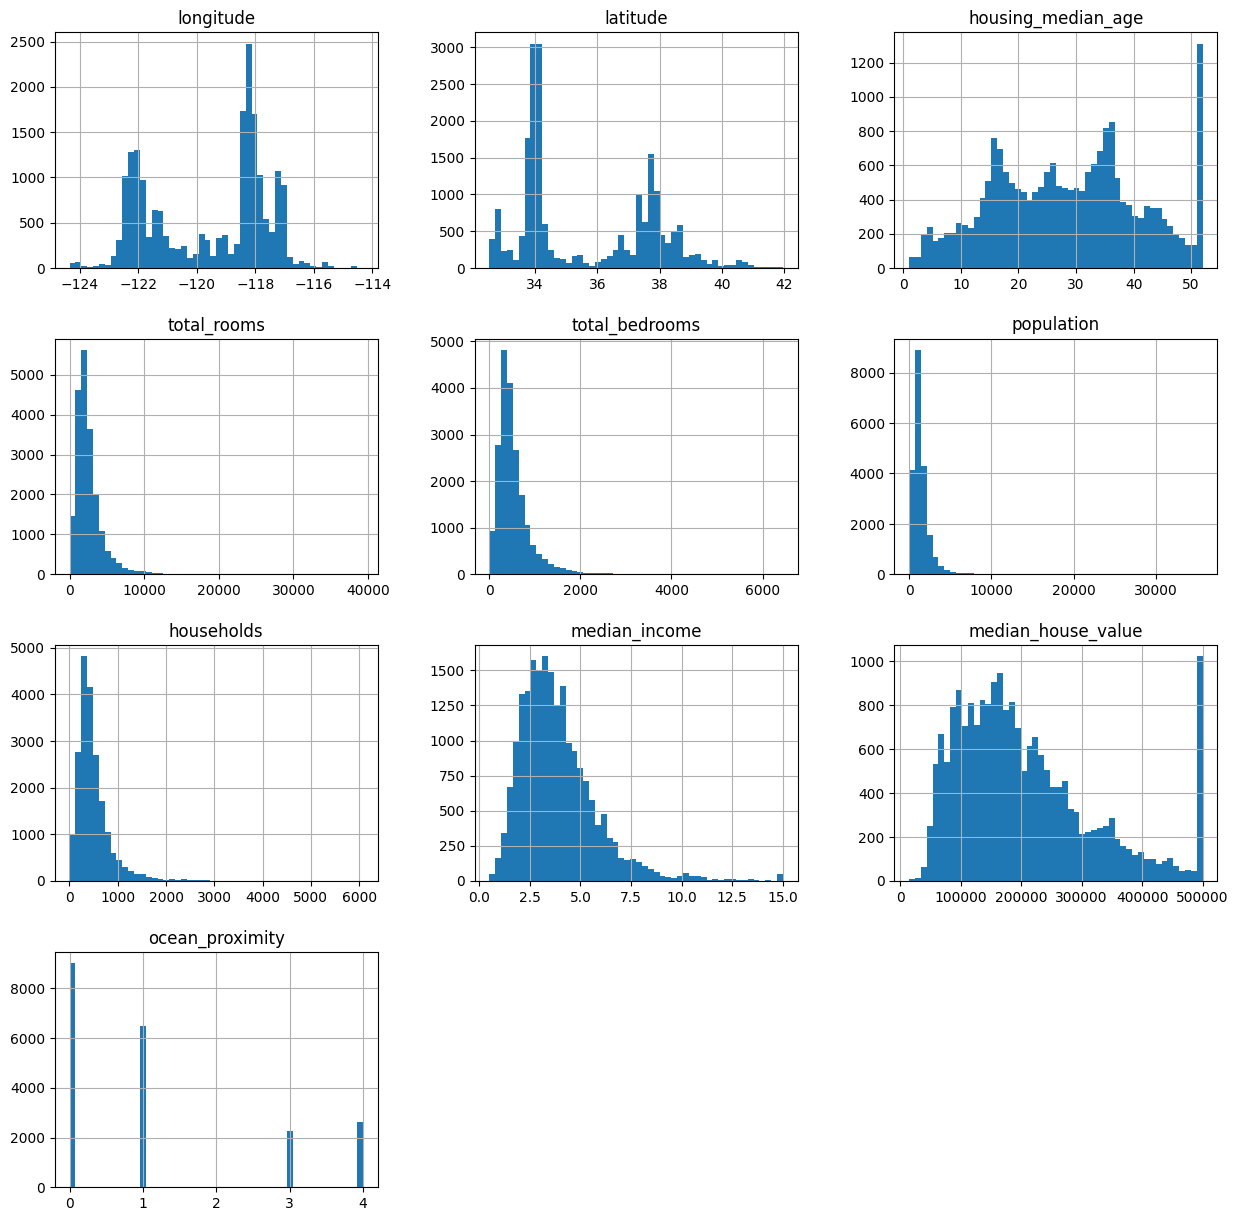

In [ ]:
housing.hist(figsize=(15,15),bins=50);

### 3.2 Biểu đồ boxplot (hộp)

#### Cột population

In [ ]:
# Xuất thông tin mô tả của cột population
housing['population'].describe()

count    20433.000000
mean      1424.946949
std       1133.208490
min          3.000000
25%        787.000000
50%       1166.000000
75%       1722.000000
max      35682.000000
Name: population, dtype: float64

<Axes: xlabel='population'>

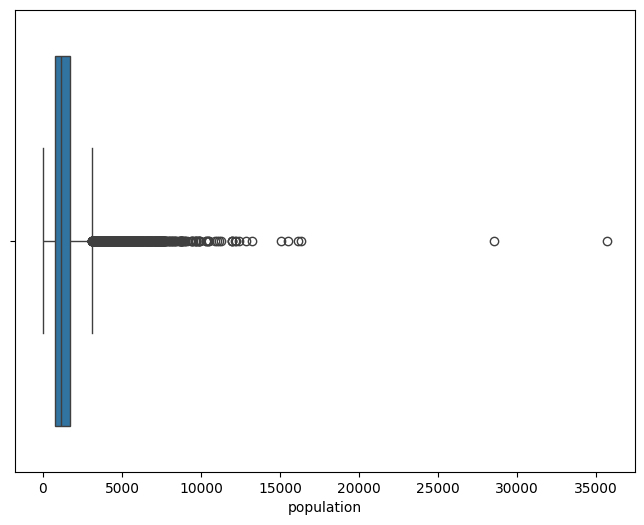

In [ ]:
# Vẽ boxplot của cột 'population'
plt.figure(figsize=(8, 6))
sns.boxplot(x=housing['population'])

giá trị dân số tập chủ yếu là dưới 18000 dân số; có 2 giá trị nằm rời rạc là khoảng 28000 và>35000 đây có thể là giá trị ngoại lai





In [ ]:
# Xem các vị trí các dòng có giá trị >20000
Outline = housing[housing['population'] > 20000  ]
Outline

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,0.0
15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,0.0


In [ ]:
# Loại bỏ các dòng có giá trị 'population'
threshold = 20000
housing = housing[housing['population'] <= threshold]

#### Cột median_income

<Axes: xlabel='median_income'>

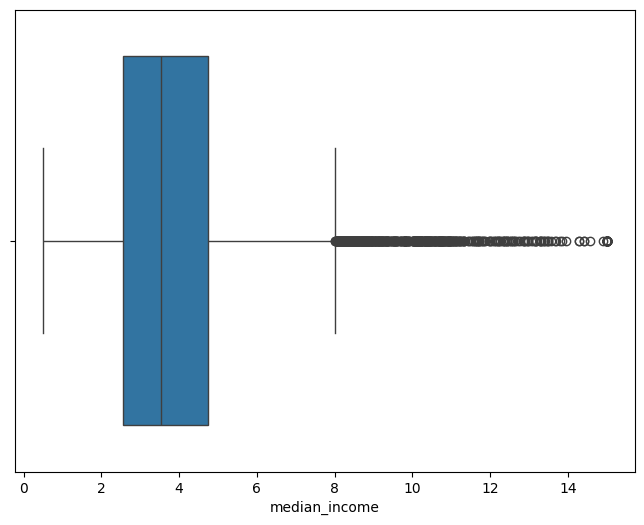

In [ ]:
# Vẽ boxplot của cột 'median_income'
plt.figure(figsize=(8, 6))
sns.boxplot(x=housing['median_income'])

In [ ]:
# Xem các vị trí các dòng có giá trị >13
Outline = housing[housing['median_income'] > 13  ]
Outline

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,500001.0,3.0
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,0.0
1583,-121.97,37.87,4.0,1029.0,126.0,416.0,122.0,13.4883,500001.0,1.0
1645,-121.89,37.82,4.0,11444.0,1355.0,3898.0,1257.0,13.2949,500001.0,1.0
1646,-121.91,37.81,7.0,3477.0,416.0,1216.0,395.0,13.1499,500001.0,1.0
...,...,...,...,...,...,...,...,...,...,...
18052,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,0.0
18354,-122.11,37.36,34.0,1575.0,183.0,511.0,180.0,13.1867,500001.0,3.0
18363,-122.11,37.31,7.0,189.0,26.0,84.0,29.0,13.8093,500001.0,0.0
18501,-121.59,37.19,52.0,220.0,32.0,55.0,26.0,15.0001,131300.0,0.0


In [ ]:
threshold = 13
housing = housing[housing['median_income'] <= threshold]

#### Cột median_house_value

<Axes: xlabel='median_house_value'>

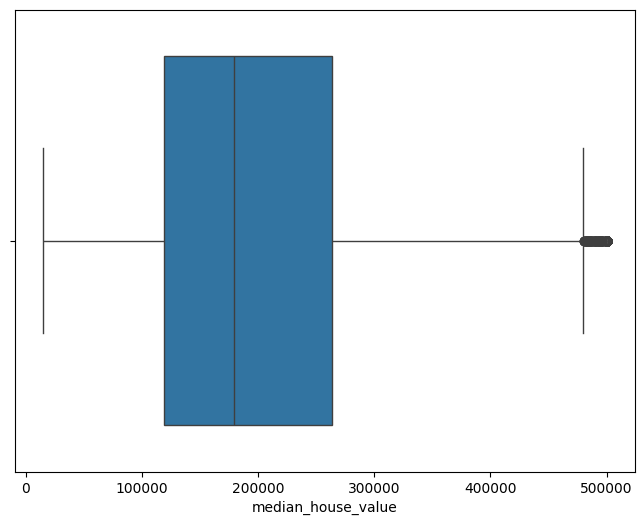

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=housing['median_house_value'])

In [ ]:
# Xem các vị trí các dòng có giá trị >480000
Outline = housing[housing['median_house_value'] > 480000  ]
Outline

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,3.0
140,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,3.0
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,3.0
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,489600.0,3.0
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,3.0
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,0.0
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,0.0
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,0.0
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,0.0


In [ ]:
threshold = 48000
housing = housing[housing['median_income'] <= threshold]

### 3.3 Biểu đồ phân tán

<Axes: xlabel='longitude', ylabel='latitude'>

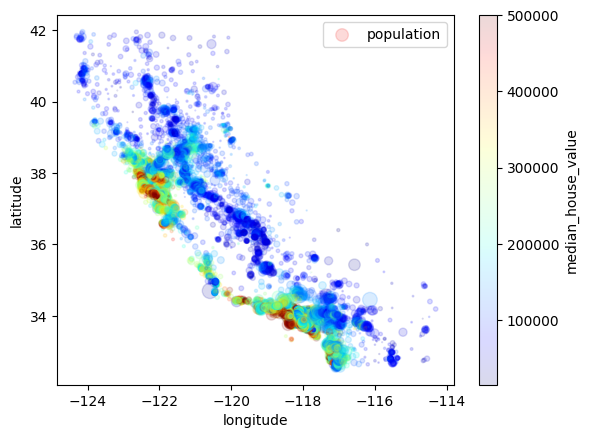

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.15, s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"))


Đối chiếu bản đồ phân tán với bản đồ thực để nhìn rõ sự phân bố của dân số

Dân số tập trung đông ở các thành phố lớn như San Francisco, San Jose và Los Angeles và giá trị của các ngôi nhà ở khu vực này rơi vào tầm >200000 đến 500000.

Kế bên là khu vực có số dân đông thứ 2 (INLAND) số lương dân cư trải đều từ Bắc xuống Nam và những khu này giá trị nhà dao động 100000 đổ xuống. Tuy nhiên càng về phía Bác thì số lượng dân số càng thưa thớt.
Ở giữa biểu đồ phân tán có một vùng màu trắng, đối chiếu với bản đồ thật thì khu vục đó là gần các Vịnh.

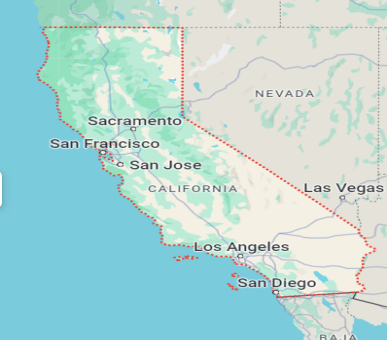

### 3.4 Ma trận tương quan

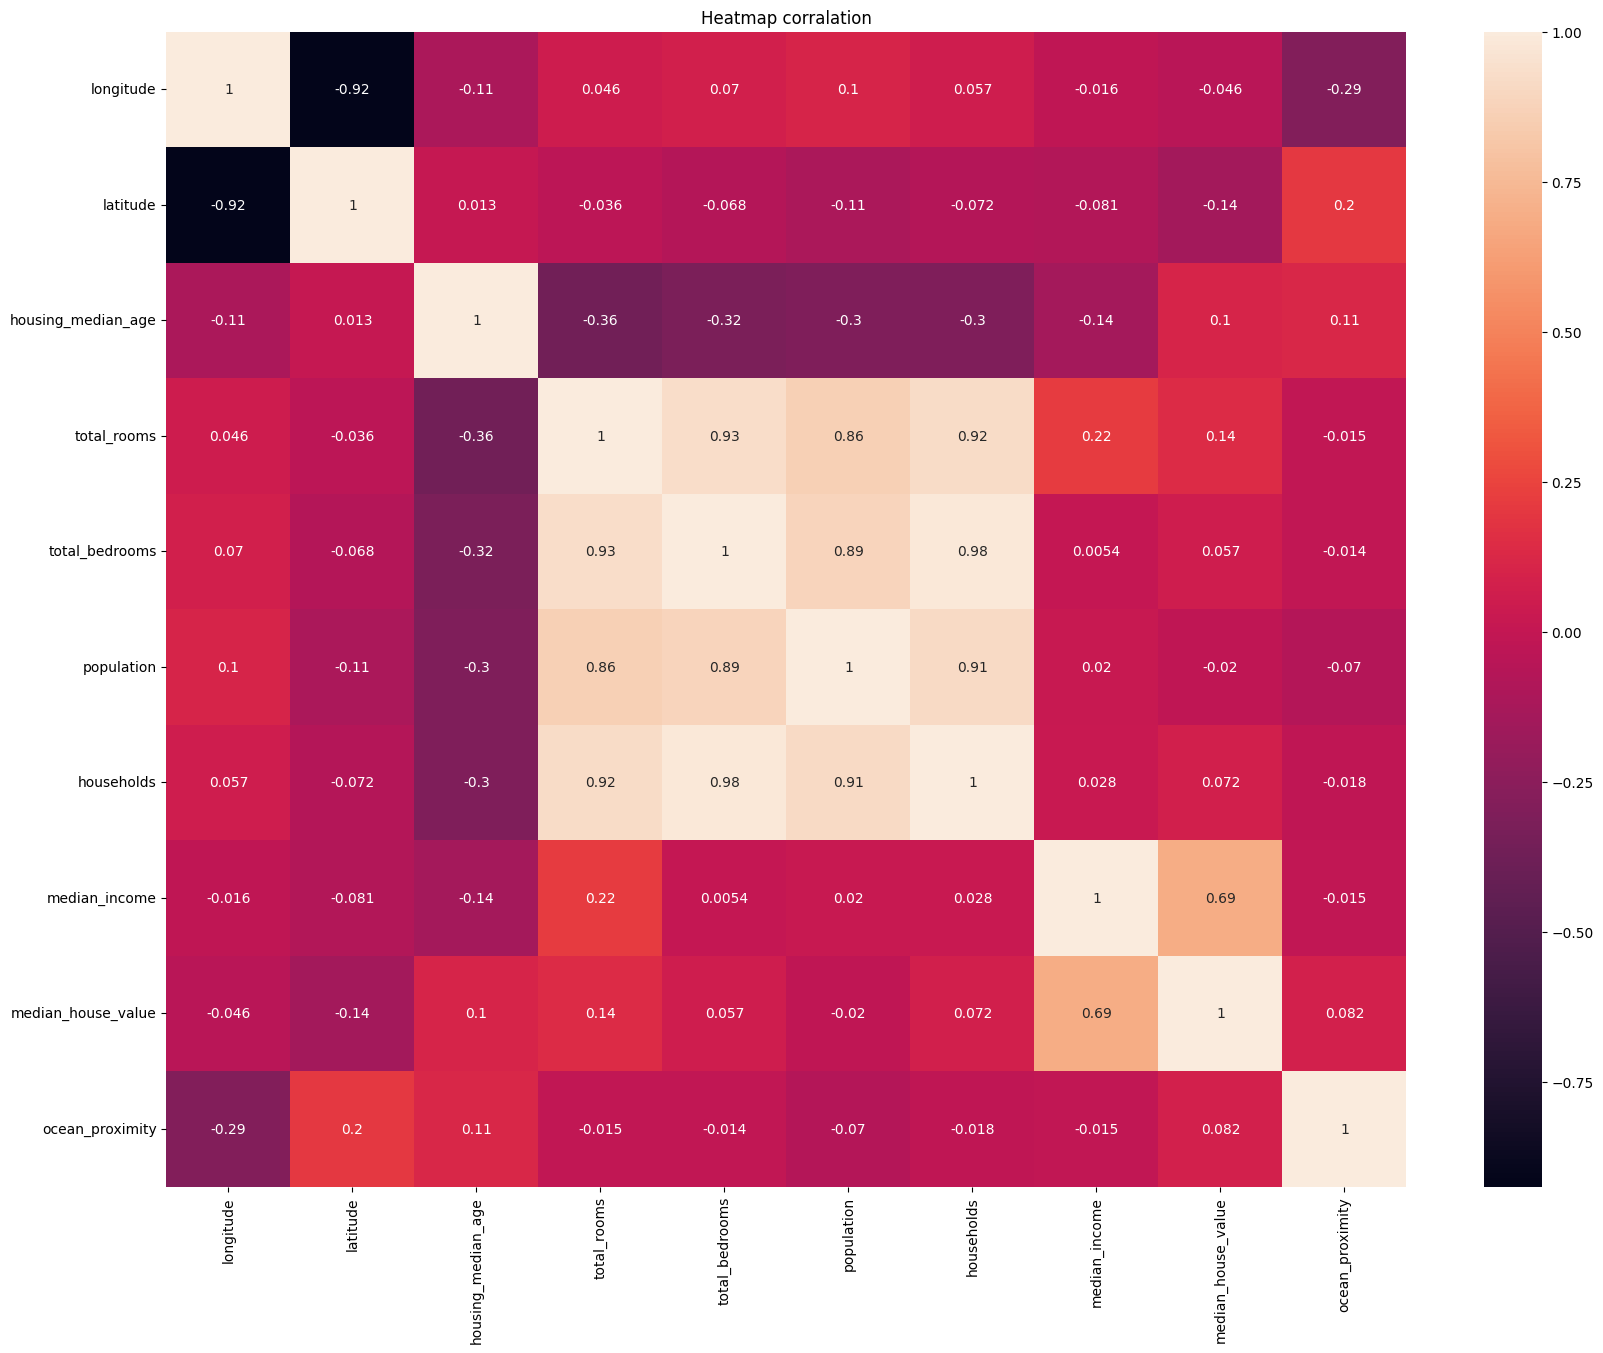

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Heatmap corralation')
sns.heatmap(data=pd.get_dummies(housing).corr(), annot=True);

In [ ]:
corr=housing.corr()
corr["median_house_value"].sort_values()

latitude             -0.144573
longitude            -0.045970
population           -0.019995
total_bedrooms        0.056620
households            0.072160
ocean_proximity       0.081739
housing_median_age    0.103466
total_rooms           0.137035
median_income         0.685970
median_house_value    1.000000
Name: median_house_value, dtype: float64

# 4 | Chia tập dữ liệu thành 80% tập dữ liệu huấn luyện và 20% tập dữ liệu kiểm tra

### 4.1 Xác định các đặc trưng (X) và biến mục tiêu (y)

In [ ]:
#tạo một DataFrame mới có tên là "X" bằng cách sao chép DataFrame"housing" và loại bỏ cột "median_house_value".
X = housing.drop('median_house_value', axis=1)
#dữ liệu trong X sau khi đã xóa cột "median_house_value".
print(X.head())
# tạo một Series mới là y bằng cách chọn cột "median_house_value" từ DataFrame "housing".
y = housing['median_house_value']

# In ra dữ liệu y là giá trị của cột median_house_value trong dataframe "housing"
print(y.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         8.3252              3.0  
1      2401.0      1138.0         8.3014              3.0  
2       496.0       177.0         7.2574              3.0  
3       558.0       219.0         5.6431              3.0  
4       565.0       259.0         3.8462              3.0  
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [ ]:
# Chia dữ liệu thành bộ huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train là tập dữ liệu đặc trưng (feature matrix) được sử dụng để huấn luyện mô hình
#y_train là vector giá trị mục tiêu (target vector) tương ứng với các mẫu dữ liệu trong X_train.
#X_test là tập dữ liệu đặc trưng được sử dụng để đánh giá hiệu suất của mô hình đã được huấn luyện
#y_test là vector giá trị mục tiêu tương ứng với các mẫu dữ liệu trong X_test

In [ ]:
# Hiển thị kích thước của từng tập
# ( size trả về tổng số phần tử trong DataFrame .)
print("X_train shape: {0}, X_train size: {1} ".format(X_train.shape, X_train.size))
print("X_test shape: {0}, X_test size: {1} ".format(X_test.shape, X_test.size))
print("y_train shape: {0}, y_train size: {1}".format(y_train.shape, y_train.size))
print("y_test shape: {0}, y_test size: {1}".format(y_test.shape, y_test.size))

X_train shape: (16282, 9), X_train size: 146538 
X_test shape: (4071, 9), X_test size: 36639 
y_train shape: (16282,), y_train size: 16282
y_test shape: (4071,), y_test size: 4071


In [ ]:
X_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12236,-116.95,33.74,18.0,1996.0,405.0,1270.0,400.0,2.7083,1.0
6028,-117.74,34.07,52.0,1868.0,316.0,947.0,328.0,4.2415,1.0
12774,-121.44,38.61,41.0,1404.0,313.0,765.0,330.0,1.8792,1.0
12405,-116.24,33.76,9.0,1961.0,595.0,966.0,275.0,3.8125,1.0
20057,-119.27,35.89,18.0,1855.0,424.0,1839.0,392.0,1.7572,1.0
4647,-118.31,34.06,52.0,2124.0,756.0,1920.0,756.0,2.1435,0.0
4200,-118.24,34.11,50.0,2141.0,451.0,1777.0,426.0,2.7679,0.0
15124,-116.88,32.86,9.0,3049.0,471.0,1527.0,515.0,5.0733,0.0
15026,-117.01,32.77,34.0,3330.0,723.0,1592.0,656.0,2.6678,0.0
15344,-117.35,33.21,18.0,2971.0,606.0,2051.0,493.0,2.6750,4.0


### 4.2 Chuẩn hóa dữ liệu

In [ ]:
# Khởi tạo preprocessor cho chuẩn hóa
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                             'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity'])])

In [ ]:
# Chuẩn hóa tập dữ liệu huấn luyện và kiểm tra.
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("dữ liệu thử nghiệm")
print(X_test[0:5,:])
# [0:5, :], trong đó 0:5 đại diện cho các hàng từ 0 đến 4,":" đại diện cho tất cả các cột.

[[ 1.30829968 -0.88764308 -0.84090899 -0.29676119 -0.31958708 -0.14242912
  -0.26346022 -0.63019017 -0.11851496]
 [ 0.91427292 -0.73355015  1.86195592 -0.3557879  -0.53209979 -0.4373518
  -0.45347824  0.23088352 -0.11851496]
 [-0.93116891  1.386395    0.98749962 -0.56975971 -0.53926314 -0.60353114
  -0.44819996 -1.09582819 -0.11851496]
 [ 1.662425   -0.87830412 -1.55637323 -0.31290131  0.13409173 -0.42000341
  -0.59335261 -0.01005087 -0.11851496]
 [ 0.15115778  0.1162957  -0.84090899 -0.3617828  -0.2742192   0.3771096
  -0.28457333 -1.16434566 -0.11851496]]
dữ liệu thử nghiệm
[[ 0.61501208 -0.79892291  0.66951552 -0.46185151 -0.31481152 -0.07760091
  -0.34527353 -0.42834443 -0.82302777]
 [ 0.73970409 -0.72421119  0.59001949 -0.72470481 -0.69924461 -0.43552565
  -0.65933109 -0.83355228 -0.82302777]
 [ 0.48533238 -0.65883843 -0.76141296  2.87131279  4.33659019  3.2678997
   4.47115532 -0.322367   -0.82302777]
 [ 0.70977801 -0.80826188  0.74901154 -0.80171622 -0.79714373 -0.60809651
  -0.

# 5 | Thuật toán


### 5.1 Linear Regression

In [ ]:
# Khởi tạo mô hình Linear Regression
linear_reg_model = LinearRegression()

#huấn luyện mô hình Linear Regression
linear_reg_model.fit(X_train,y_train)

# Dự đoán giá trị đầu ra trên tập dữ liệu kiểm tra
y_pred = linear_reg_model.predict(X_test)

In [ ]:
# In ra giá trị dự đoán (y_pred) trong tập dữ liệu kiểm tra (X_test)
# và giá trị thực tế tương ứng (y_test) trong tập dữ liệu kiểm tra
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])

print("y_test: ")
print(y_test[0:5])
# y_test chứa giá trị thực tế của biến mục tiêu (target variable) tương ứng với từng mẫu trong tập dữ liệu kiểm tra.

4071
4071
[192845.79571596 139793.61396676 291040.81547608 180940.15121025
  93147.16559845]
y_test: 
8420     167700.0
6806     188500.0
3554     230300.0
7830     147400.0
20565    225000.0
Name: median_house_value, dtype: float64


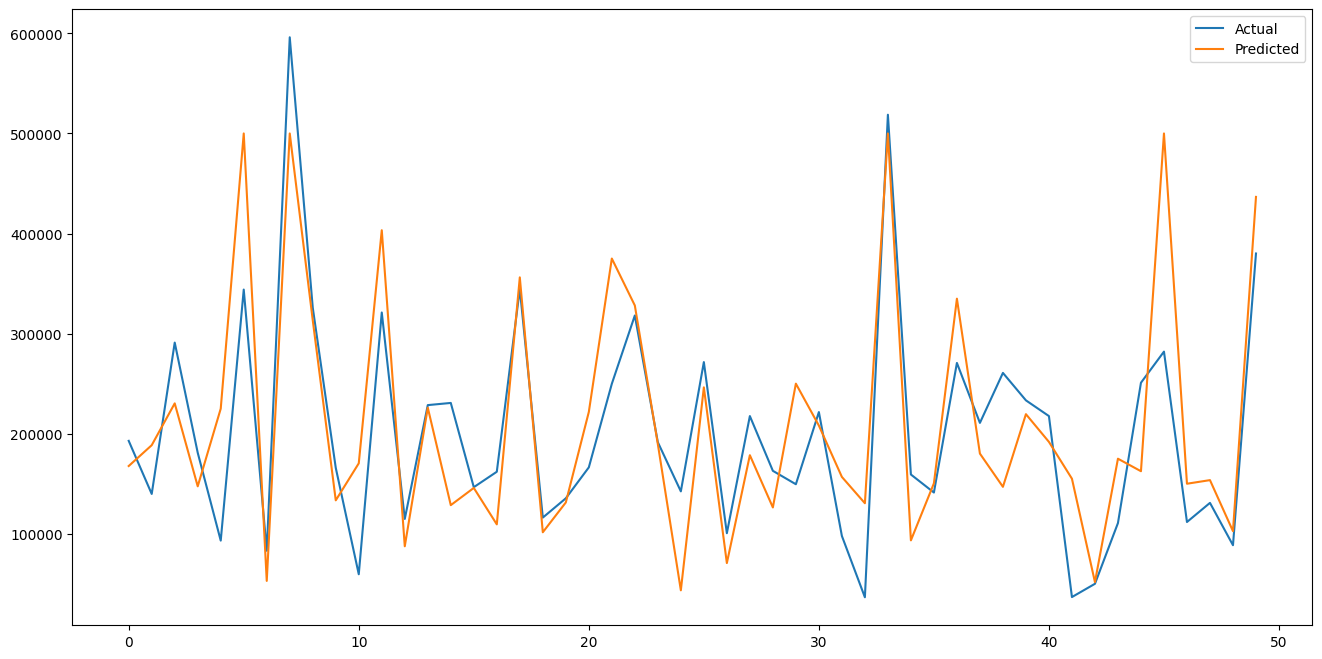

In [ ]:
l_rep_graph = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
plt.figure(figsize=(16,8))
l_rep_graph = l_rep_graph.reset_index() #Đặt lại chỉ số của DataFrame test đảm bảo xếp theo thứ tự tăng dần
l_rep_graph = l_rep_graph.drop(['index'],axis=1) #  Xóa cột 'index'.Cột này là kết quả của việc đặt lại chỉ số và không cần thiết cho việc vẽ đồ thị.
plt.plot(l_rep_graph[:50]) #Vẽ đồ thị dựa trên 50 hàng đầu tiên của DataFrame test.
plt.legend(['Actual','Predicted'])

In [ ]:
# Tính toán MSE
lr_mse = (mean_squared_error(y_test, y_pred))

# Tính toán RMSE
lr_rmse = (np.sqrt(lr_mse))
# Tính toán MAE
lr_mae = (mean_absolute_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", lr_mae)
print("Mean Squared Error (MSE):", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)

Mean Absolute Error (MAE): 49903.83282880087
Mean Squared Error (MSE): 4567458495.185758
Root Mean Squared Error (RMSE): 67582.97489150472


In [ ]:
#Sample new test data with the same attribute types
# Dữ liệu mới
new_data1 = {
    'longitude': [-122.23, -122.22, -122.24],
    'latitude': [37.88, 37.86, 37.85],
    'housing_median_age': [41.0, 21.0, 52.0],
    'total_rooms': [880.0, 7099.0, 1467.0],
    'total_bedrooms': [129.0, 1106.0, 190.0],
    'population': [322.0, 2401.0, 496.0],
    'households': [126.0, 1138.0, 177.0],
    'median_income': [8.3252, 8.3014, 7.2574],
    'ocean_proximity': [1.5, 2.0, 0.8]
}

new_data1 = pd.DataFrame(new_data1)


# Tiền xử lý dữ liệu mới
new_data1_preprocessed = preprocessor.fit_transform(new_data1)

# Dự đoán với mô hình Linear Regression
new_predictions1 = linear_reg_model.predict(new_data1_preprocessed)

# In kết quả dự đoán
print("Predictions for new test data:")
print(new_predictions1)

Predictions for new test data:
[147740.78568067 167441.60107567 301613.92929811]


### 5.2 Decision Tree Regression

In [ ]:
# Khởi tạo mô hình DecisionTreeRegressor
dt_reg_model = DecisionTreeRegressor(max_depth=3)
dt_reg_model.fit(X_train,y_train)
dt_reg_model_y_pred = dt_reg_model.predict(X_test)

In [ ]:
print(len(dt_reg_model_y_pred))
print(len(y_test))
print(dt_reg_model_y_pred[0:5])
print(y_test[0:5])

4071
4071
[171304.08514493 171304.08514493 195012.35995086 171304.08514493
 117395.99323508]
8420     167700.0
6806     188500.0
3554     230300.0
7830     147400.0
20565    225000.0
Name: median_house_value, dtype: float64


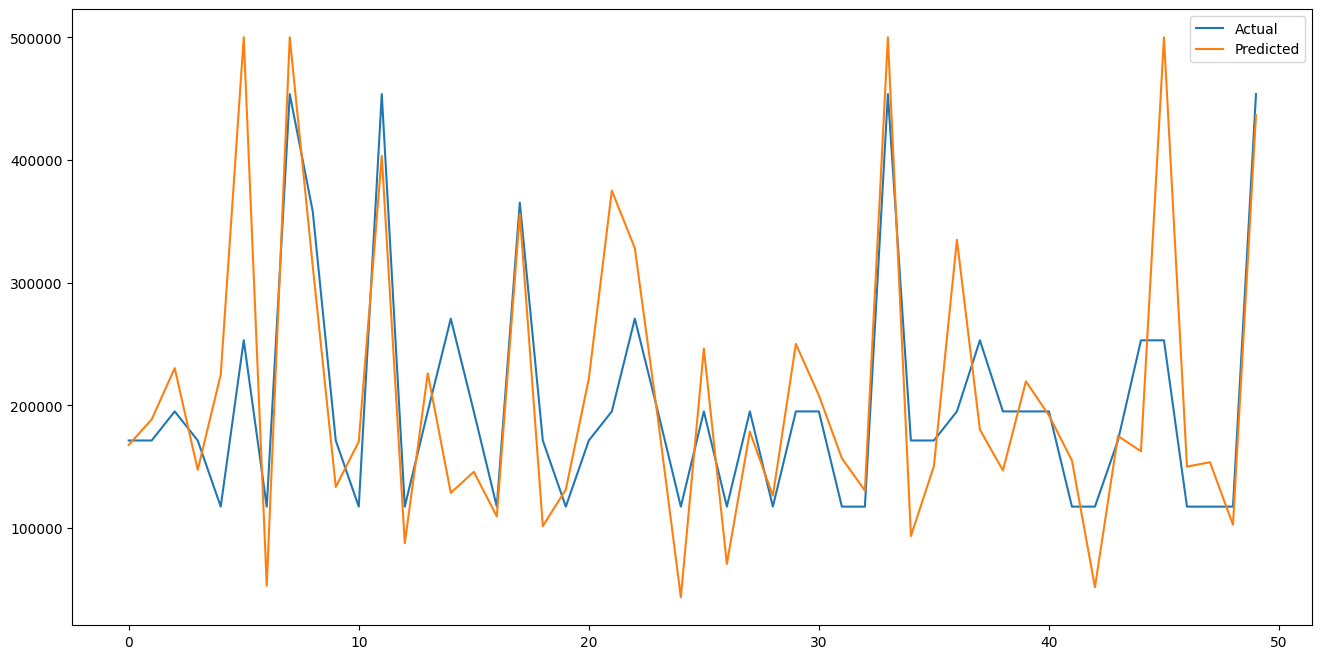

In [ ]:
dt_rep_graph = pd.DataFrame({'Predicted':dt_reg_model_y_pred,'Actual':y_test})
plt.figure(figsize=(16,8))
dt_rep_graph = dt_rep_graph.reset_index() #Đặt lại chỉ số của DataFrame test đảm bảo xếp theo thứ tự tăng dần
dt_rep_graph = dt_rep_graph.drop(['index'],axis=1) #  Xóa cột 'index'.Cột này là kết quả của việc đặt lại chỉ số và không cần thiết cho việc vẽ đồ thị.
plt.plot(dt_rep_graph[:50]) #Vẽ đồ thị dựa trên 50 hàng đầu tiên của DataFrame test.
plt.legend(['Actual','Predicted'])

In [ ]:
# Tính toán MSE
dt_re_mse = (mean_squared_error(y_test, dt_reg_model_y_pred))

# Tính toán RMSE
dt_re_rmse = (np.sqrt(dt_re_mse))

# Tính toán MAE
dt_re_mae = (mean_absolute_error(y_test, dt_reg_model_y_pred))

print("Mean Absolute Error (MAE):", dt_re_mae)
print("Mean Squared Error (MSE):", dt_re_mse)
print("Root Mean Squared Error (RMSE):", dt_re_rmse)

Mean Absolute Error (MAE): 59979.823095978085
Mean Squared Error (MSE): 6620641998.029221
Root Mean Squared Error (RMSE): 81367.32758318428


In [ ]:
# Dữ liệu mới
new_data2 = {
    'longitude': [-122.23, -122.22, -122.24],
    'latitude': [37.88, 37.86, 37.85],
    'housing_median_age': [41.0, 21.0, 52.0],
    'total_rooms': [880.0, 7099.0, 1467.0],
    'total_bedrooms': [129.0, 1106.0, 190.0],
    'population': [322.0, 2401.0, 496.0],
    'households': [126.0, 1138.0, 177.0],
    'median_income': [8.3252, 8.3014, 7.2574],
    'ocean_proximity': [1.5, 2.0, 0.8]
}

new_data2 = pd.DataFrame(new_data2)


# Tiền xử lý dữ liệu mới
new_data2_preprocessed = preprocessor.transform(new_data2)

# Dự đoán với mô hình Decision Tree Regression
new_predictions2 = dt_reg_model.predict(new_data2_preprocessed)

# In kết quả dự đoán
print("Predictions for new test data:")
print(new_predictions2)

Predictions for new test data:
[270577.09155313 270577.09155313 171304.08514493]


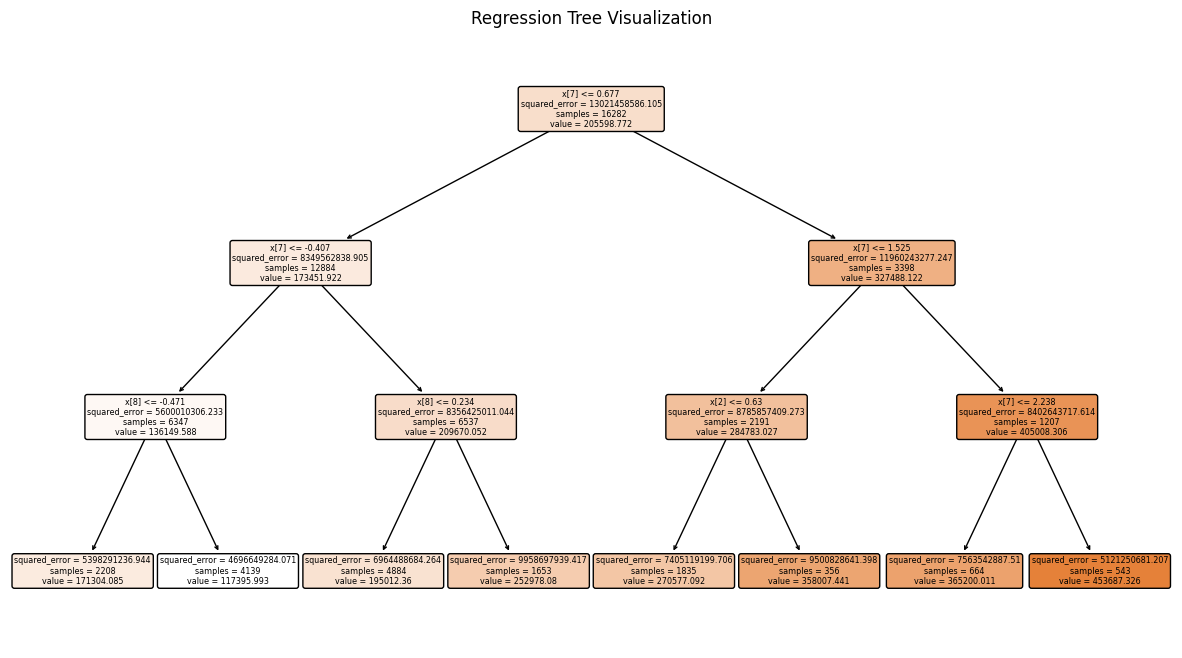

In [ ]:
from sklearn.tree import plot_tree


# Visualize the regression tree
plt.figure(figsize=(15, 8))
plot_tree(dt_reg_model, filled=True, rounded=True)
plt.title("Regression Tree Visualization")
plt.show()

### 5.3 Random Forest Regression

In [ ]:
# Khởi tạo mô hình RandomForestRegressor
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_model.fit(X_train,y_train)
rf_reg_model_y_pred = rf_reg_model.predict(X_test)

In [ ]:
print(len(rf_reg_model_y_pred))
print(len(y_test))
print(rf_reg_model_y_pred[0:5])
print(y_test[0:5])

4071
4071
[168167. 197110. 218789. 162835. 115399.]
8420     167700.0
6806     188500.0
3554     230300.0
7830     147400.0
20565    225000.0
Name: median_house_value, dtype: float64


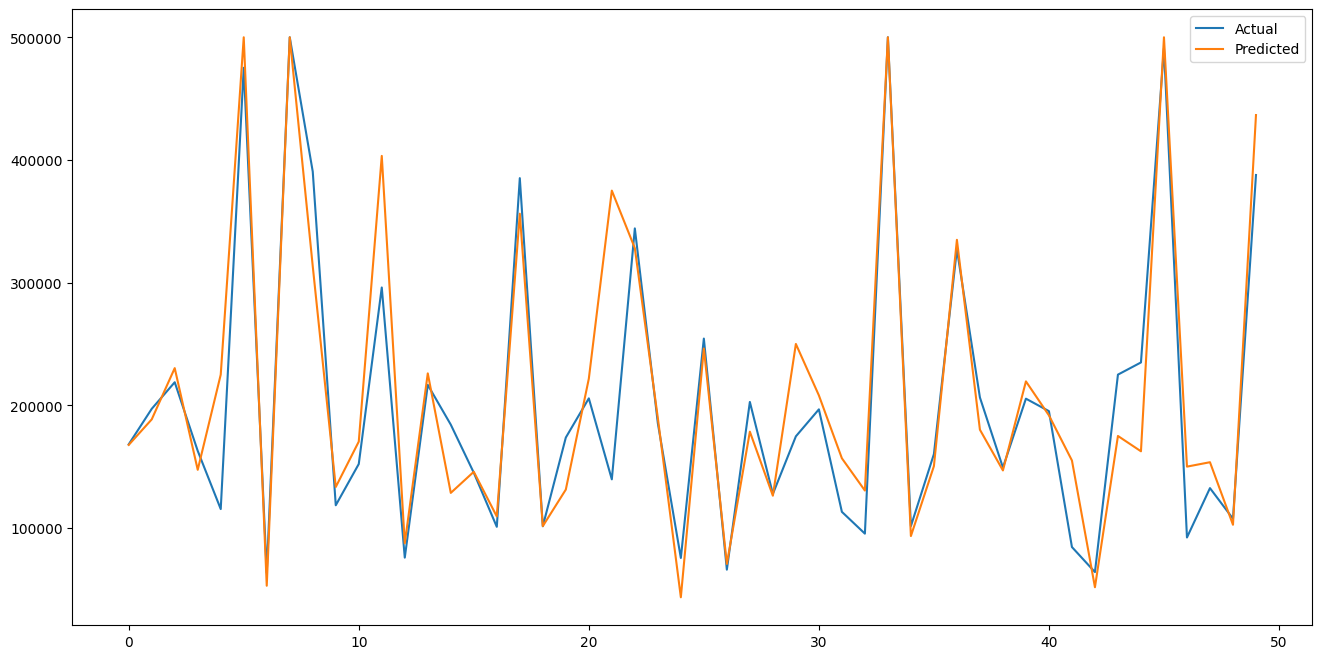

In [ ]:
rf_rep_graph = pd.DataFrame({'Predicted':rf_reg_model_y_pred,'Actual':y_test})
plt.figure(figsize=(16,8))
rf_rep_graph = rf_rep_graph.reset_index() #Đặt lại chỉ số của DataFrame test đảm bảo xếp theo thứ tự tăng dần
rf_rep_graph = rf_rep_graph.drop(['index'],axis=1) #  Xóa cột 'index'.Cột này là kết quả của việc đặt lại chỉ số và không cần thiết cho việc vẽ đồ thị.
plt.plot(rf_rep_graph[:50]) #Vẽ đồ thị dựa trên 50 hàng đầu tiên của DataFrame test.
plt.legend(['Actual','Predicted'])

In [ ]:
# Tính toán các độ đo đánh giá
rf_re_mse = mean_squared_error(y_test, rf_reg_model_y_pred)

rf_re_rmse = np.sqrt(rf_re_mse)

rf_re_mae = mean_absolute_error(y_test, rf_reg_model_y_pred)


print("Mean Absolute Error (MAE) :", rf_re_mae)
print("Mean Squared Error (MSE) :", rf_re_mse)
print("Root Mean Squared Error (RMSE) :", rf_re_rmse)

Mean Absolute Error (MAE) : 32193.938157700813
Mean Squared Error (MSE) : 2481033139.5351477
Root Mean Squared Error (RMSE) : 49809.97028241582


In [ ]:
# Sample new test data with the same attribute types
# Dữ liệu mới
new_data3 = {
    'longitude': [-122.23, -122.22, -122.24],
    'latitude': [37.88, 37.86, 37.85],
    'housing_median_age': [41.0, 21.0, 52.0],
    'total_rooms': [880.0, 7099.0, 1467.0],
    'total_bedrooms': [129.0, 1106.0, 190.0],
    'population': [322.0, 2401.0, 496.0],
    'households': [126.0, 1138.0, 177.0],
    'median_income': [8.3252, 8.3014, 7.2574],
    'ocean_proximity': [1.5, 2.0, 0.8]
}

new_data3 = pd.DataFrame(new_data3)


# Tiền xử lý dữ liệu mới
new_data3_preprocessed = preprocessor.transform(new_data3)

# Dự đoán với mô hình Decision Tree Regression
new_predictions3 = rf_reg_model.predict(new_data3_preprocessed)

# In kết quả dự đoán
print("Predictions for new test data:")
print(new_predictions3)

Predictions for new test data:
[196708.01 225007.04 380424.29]
